# Machine Learning

In [1]:
import pandas as pd
import numpy as np

In [2]:
# load in our data set from sklearn
from sklearn.datasets import load_iris
iris_data = load_iris()
print(iris_data.data.shape)
print(type(iris_data.data))

(150, 4)
<class 'numpy.ndarray'>


In [ ]:
# how many rows do we have?
# how many cols do we have?

In [3]:
print(iris_data.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
# lets construct a dataframe and populate it with our data
target_names = iris_data.target_names[iris_data.target]
column_names = [name[:-5].replace(' ', '_') for name in iris_data.feature_names]
iris_df = pd.DataFrame(iris_data.data, columns=column_names)
iris_df['target'] = iris_data.target
iris_df['label'] = target_names
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
target          150 non-null int64
label           150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
# lets take a look at some aggregate data
iris_df.groupby('target').mean()

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [9]:
iris_df.groupby('target').max()

,sepal_length,sepal_width,petal_length,petal_width,label
target,,,,,
0,5.8,4.4,1.9,0.6,setosa
1,7.0,3.4,5.1,1.8,versicolor
2,7.9,3.8,6.9,2.5,virginica


In [10]:
iris_df.groupby('target').min()

,sepal_length,sepal_width,petal_length,petal_width,label
target,,,,,
0,4.3,2.3,1.0,0.1,setosa
1,4.9,2.0,3.0,1.0,versicolor
2,4.9,2.2,4.5,1.4,virginica


In [11]:
iris_df.groupby('target').median()

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
0,5.0,3.4,1.50,0.2
1,5.9,2.8,4.35,1.3
2,6.5,3.0,5.55,2.0


In [12]:
iris_df.groupby('target').std()

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
0,0.352490,0.381024,0.173511,0.107210
1,0.516171,0.313798,0.469911,0.197753
2,0.635880,0.322497,0.551895,0.274650


In [ ]:
# lets do some visualizations

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

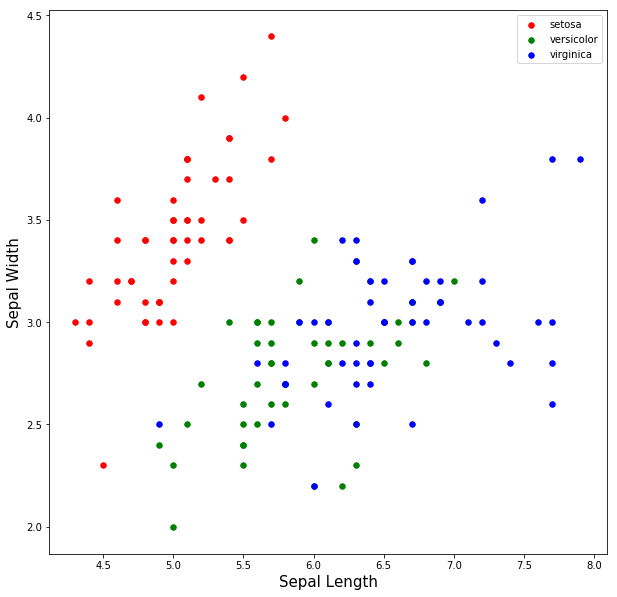

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
for target, color in zip(iris_df.target.unique(), ['r', 'g', 'b']):
    sub_df = iris_df.query('target == @target')
    ax.scatter(x=sub_df.sepal_length.values, y=sub_df.sepal_width.values, 
               color=color, label=iris_data.target_names[target], s=30)
ax.legend(loc='best')
ax.set_xlabel('Sepal Length', size=15)
ax.set_ylabel('Sepal Width', size=15);

In [ ]:
#linearly seperable

In [ ]:
iris_df[['sepal_length']].head()

In [15]:
# now lets build a model that can make predicitons for us
from sklearn.linear_model import LogisticRegression

X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_df.label.values
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
# print('Model guess for single point: {}'.format(logistic_model.predict(np.array([[4.5, 3.3, 1.6, 0.2]]))[0]))
logistic_model.predict(np.array([[7.2, 2.8, 6.6, 2], [3.5, 2.5, 1.6, .2], [4.7, 3.6, 1.9, .1]]))

array(['virginica', 'setosa', 'setosa'], dtype=object)

In [18]:
print('Model guess for single point: {}'.format(logistic_model.predict_proba(np.array([[4.5, 3.3, 1.6, 0.2]]))[0]))

Model guess for single point: [  8.58596602e-01   1.41336127e-01   6.72712258e-05]


In [19]:
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [20]:
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [22]:
# logistic_model.predict(X)

In [23]:
logistic_model.score(X, y)

0.95999999999999996

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.20)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_model.score(X_test, y_test)

0.83333333333333337